In [10]:
!pip install pygltflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.0 MB/s eta 0:00:00
  Created wheel for pygltflib: filename=pygltflib-1.16.3-py3-none-any.whl size=27408 sha256=eaa663c1d58db41a1e0b4bb81950b7c3858ac27d6e967d1d667de96479058cac
  Stored in directory: /root/.cache/pip/wheels/de/4a/cc/0d166b319ddda5007d0dfa6087346a30c4713b0fdaeaeff304
Successfully built pygltflib


In [8]:
!pip install qiskit_optimization
!pip install dwave-neal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 5.3 MB/s eta 0:00:00


In [4]:
pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 8.9 MB/s eta 0:00:00


In [2]:
!git clone https://github.com/aqarios/PushQuantumSP

Cloning into 'PushQuantumSP'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 28 (delta 9), reused 28 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 4.00 MiB | 11.15 MiB/s, done.
Resolving deltas: 100% (9/9), done.


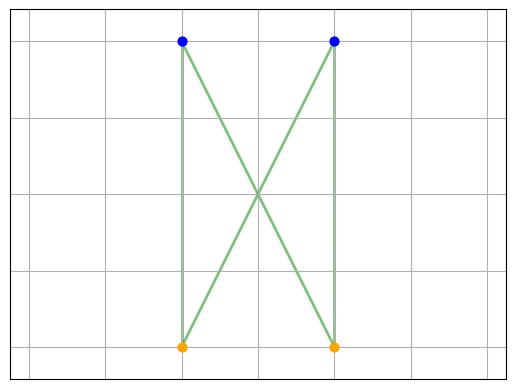

solution clean: {'x_1.0_0.0_2.5_0_-10': 1, 'x_0.0_0.0_2.5_0_-10': 0}
objective = 1


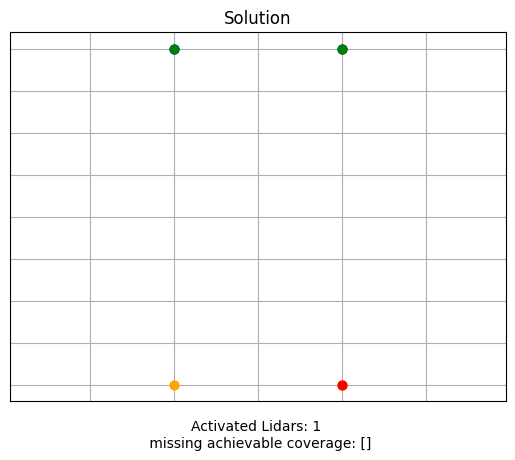

['P1', 'P2', 'P3', '_QuboSPBinary__compute_QUBO_Matrix_binary', '_QuboSPBinary__inverter_matrix', '_QuboSPBinary__is_in_list', '_QuboSPBinary__needed_bitnum', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'gra', 'mandatoryLidars', 'model', 'solve', 'usedLidars']
QUBO Matrix (Q):
[[-3.  4. -2. -2.]
 [ 4. -3. -2. -2.]
 [-2. -2.  6.  0.]
 [-2. -2.  0.  6.]]


In [113]:
#This script demonstrates how to solve a combinatorial
#optimization problem using a QUBO (Quadratic Unconstrained Binary Optimization) formulation
#with Simulated Annealing as the solver.

import neal

from PushQuantumSP.data.sp_data import SPData
from PushQuantumSP.models import SPQuboBinary
from PushQuantumSP.evaluation.evaluation import SPEvaluation
from PushQuantumSP.plotting.sp_plot import SPPlot

params = {"version": 1, "num_cols": 2, "rad_max": 2.4}
data = SPData().gen_problem(**params)
plt = SPPlot(data).plot_problem()
plt.show()

config = {"num_reads":1000,"num_sweeps":1000}
solve_func = neal.SimulatedAnnealingSampler().sample_qubo
qubo_model_bin = SPQuboBinary(data)
answer = qubo_model_bin.solve(solve_func, **config)

evaluation = SPEvaluation(data, answer['solution'])
print(f"solution clean: {evaluation.solution}")

print(f"objective = {evaluation.get_objective()}")
for constraint, violations in evaluation.check_solution().items():
    if len(violations) > 0:
        print(f"constraint {constraint} was violated {len(violations)} times")
plt = SPPlot(data, evaluation).plot_solution(hide_never_covered = True)
plt.show()

print(dir(qubo_model_bin))


# Get the Q matrix as a dictionary

Q_matrix = qubo_model_bin._QuboSPBinary__compute_QUBO_Matrix_binary(qubo_model_bin.P1, qubo_model_bin.P2, qubo_model_bin.P3)  # Replace with the actual attribute name
print("QUBO Matrix (Q):")
print(Q_matrix)

In [114]:
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import qaoa_ansatz
import numpy as np

from qiskit.circuit.library import QAOAAnsatz

# 1. Define the Cost and Mixer Hamiltonians

# Cost Hamiltonian (Example: H_c = Z0 * Z1 + Z1 * Z2)

        #THIS IS MY COST HAMILTONIAN#
#cost_hamiltonian = SparsePauliOp(["ZZII", "IIZZ", "ZIIZ"])
matrix = Q_matrix
n_cols, n_rows = Q_matrix.shape
N =  n_cols  # Number of qubits

# Initialize lists for Pauli strings and coefficients
pauli_strings = []
coeffs = []

# Diagonal terms: Identity terms (on qubits 1, 2, 3, 4)
for i in range(N):
    # Identity term for the i-th qubit
    pauli_string = ['I'] * N
    pauli_string[i] = 'Z'  # Set the i-th qubit to Z (Identity - Z)
    pauli_strings.append(''.join(pauli_string))
    coeffs.append(-matrix[i, i]/2) # Diagonal coefficients (self-interaction)

# Off-diagonal terms: Interaction terms between qubits
for i in range(N):
    for j in range(i + 1, N):
        if matrix[i, j] != 0:  # Non-zero off-diagonal term
            pauli_string = ['I'] * N
            # Set both i-th and j-th qubits to "I - Z" (or Z on both qubits)
            pauli_string[i] = 'Z'  # Apply Z operator on qubit i
            pauli_string[j] = 'Z'  # Apply Z operator on qubit j
            pauli_strings.append(''.join(pauli_string))
            # Add the coefficient matrix[i, j] divided by 2 (since we use (I - Z)/2)
            coeffs.append(matrix[i, j] / 2)  # Off-diagonal coefficients

# Create the SparsePauliOp Hamiltonian
#plt._copy_docstring_and_deprecatorshamiltonian = SparsePauliOp(pauli_strings, coeffs)
cost_hamiltonian = SparsePauliOp(pauli_strings, coeffs)

# Print the Hamiltonian
print(cost_hamiltonian)

# Generate Pauli strings for the cycle
pauli_strings = []
coeffs = []
# For X operators
for i in range(N):
    pauli_string = ['I'] * N
    pauli_string[i] = 'X'  # Apply X on the i-th qubit
    pauli_strings.append(''.join(pauli_string))
    coeffs.append(1.0)  # Example coefficient for X

# For Z operators
#for i in range(N):
    #pauli_string = ['I'] * N
    #pauli_string[i] = 'Z'  # Apply Z on the i-th qubit
    #pauli_strings.append(''.join(pauli_string))
    #coeffs.append(-alpha * N / 2)  # Example coefficient for Z

# Create the SparsePauliOp Hamiltonian
mix_hamiltonian = SparsePauliOp(pauli_strings, coeffs)

print(mix_hamiltonian)
        #THIS IS MY MIXING HAMILTONIAN#
#mix_hamiltonian = SparsePauliOp(["XIII", "IIII", "ZIII"],  # Pauli strings: Z and X on the first qubit
    #coeffs=np.array([1.0,alpha*N/2,-alpha*N/2]))




# 2. Initialize the QAOAAnsatz
p = 10  # Number of layers
qaoa_ansatz = QAOAAnsatz(cost_operator=cost_hamiltonian,
                         reps=p,
                        mixer_operator=mix_hamiltonian)

# Get the parameters (gammas and betas)
parameters = qaoa_ansatz.parameters

# Print the circuit
#print("QAOA Ansatz Circuit:")
#print(qaoa_ansatz.decompose().draw())


from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from scipy.optimize import minimize
# 3. Define the objective function for optimization



def objective_function(params):
    # Bind the parameters (gammas and betas) to the QAOA ansatz
    qc_bound = qaoa_ansatz.assign_parameters(params)

    # Simulate the circuit using Statevector
    statevector = Statevector.from_instruction(qc_bound)

    # Calculate the expectation value of the cost Hamiltonian
    expectation_value = statevector.expectation_value(cost_hamiltonian)

    return expectation_value.real  # We only care about the real part

# 4. Initialize random values for gamma and beta
initial_parameters = np.random.rand(len(qaoa_ansatz.parameters))  # Random initial parameters for gamma and beta

# 5. Use COBYLA from scipy to minimize the objective function
result = minimize(objective_function, initial_parameters, method='COBYLA', options={'maxiter': 100})

# Print the optimized parameters
print("\nOptimized Parameters:")
print(result.x)

# Now we can use the optimized parameters to create the final QAOA circuit
qc_final = qaoa_ansatz.assign_parameters(result.x)

 #Simulate the final circuit
statevector = Statevector.from_instruction(qc_final)

print("\nFinal Statevector:")
print(statevector)

#Calculate and print the probabilities of the final state
probabilities = [abs(amplitude)**2 for amplitude in statevector]
print("\nProbabilities of the final state:")
print(probabilities)

SparsePauliOp(['ZIII', 'IZII', 'IIZI', 'IIIZ', 'ZZII', 'ZIZI', 'ZIIZ', 'IZZI', 'IZIZ'],
              coeffs=[ 1.5+0.j,  1.5+0.j, -3. +0.j, -3. +0.j,  2. +0.j, -1. +0.j, -1. +0.j,
 -1. +0.j, -1. +0.j])
SparsePauliOp(['XIII', 'IXII', 'IIXI', 'IIIX'],
              coeffs=[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j])

Optimized Parameters:
[1.03873876 1.02618875 0.0234426  0.41010707 1.35371059 0.44737833
 0.6950217  0.74758654 0.67728776 0.91950348 0.93786207 1.90360774
 0.19976487 0.06094653 0.03608292 0.77126356 1.17722613 0.00716074
 0.81326866 0.82211405]

Final Statevector:
Statevector([-0.00526021+0.17700241j, -0.05298056-0.08830914j,
             -0.05298056-0.08830914j,  0.09952088-0.03694077j,
              0.03353136-0.64340737j, -0.05601373+0.04143488j,
             -0.05601373+0.04143488j,  0.0780706 +0.06154985j,
              0.03353136-0.64340737j, -0.05601373+0.04143488j,
             -0.05601373+0.04143488j,  0.0780706 +0.06154985j,
              0.02925861+0.07954125j,  0.10298748

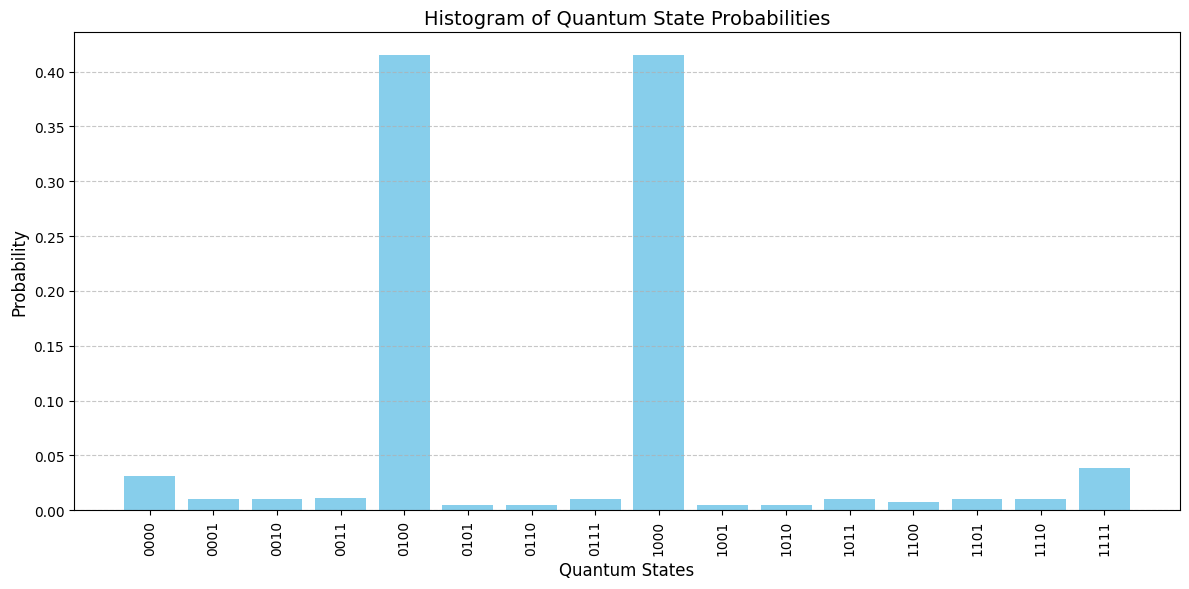

In [115]:
#HISTOGRAM DESIGN

import matplotlib.pyplot as plt
import numpy as np

def plot_histogram(probabilities):
    """
    Plots a histogram of quantum state probabilities.

    Parameters:
        probabilities (list): A list of probabilities for each quantum state.
    """
    # Number of qubits (calculated from the length of the probabilities vector: 2^n_qubits)
    n_qubits = int(np.log2(len(probabilities)))

    # Generate the corresponding quantum states
    states = [bin(i)[2:].zfill(n_qubits) for i in range(2**n_qubits)]

    # Create the histogram
    plt.figure(figsize=(12, 6))
    plt.bar(states, probabilities, color='skyblue')

    # Labeling the plot
    plt.xlabel('Quantum States', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title('Histogram of Quantum State Probabilities', fontsize=14)
    plt.xticks(rotation=90, fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()


plot_histogram(probabilities)